---
title: "Data cleaning"
format: 
  html:
    code-fold: true
execute: 
  enabled: true
---

# Introduction:
### Link to raw (unprocessed) data: <https://github.com/anly501/dsan-5000-project-WillWangUNC/tree/main/dsan-website/5000-website/5000-website-Zenan/Data>
### Link to cleaned data: <https://github.com/anly501/dsan-5000-project-WillWangUNC/tree/main/dsan-website/5000-website/5000-website-Zenan/cleandata>

## First dataset: Tesla Deaths - Deaths

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("./Data/Tesla Deaths - Deaths.csv")

### Check for any missing values

<Axes: >

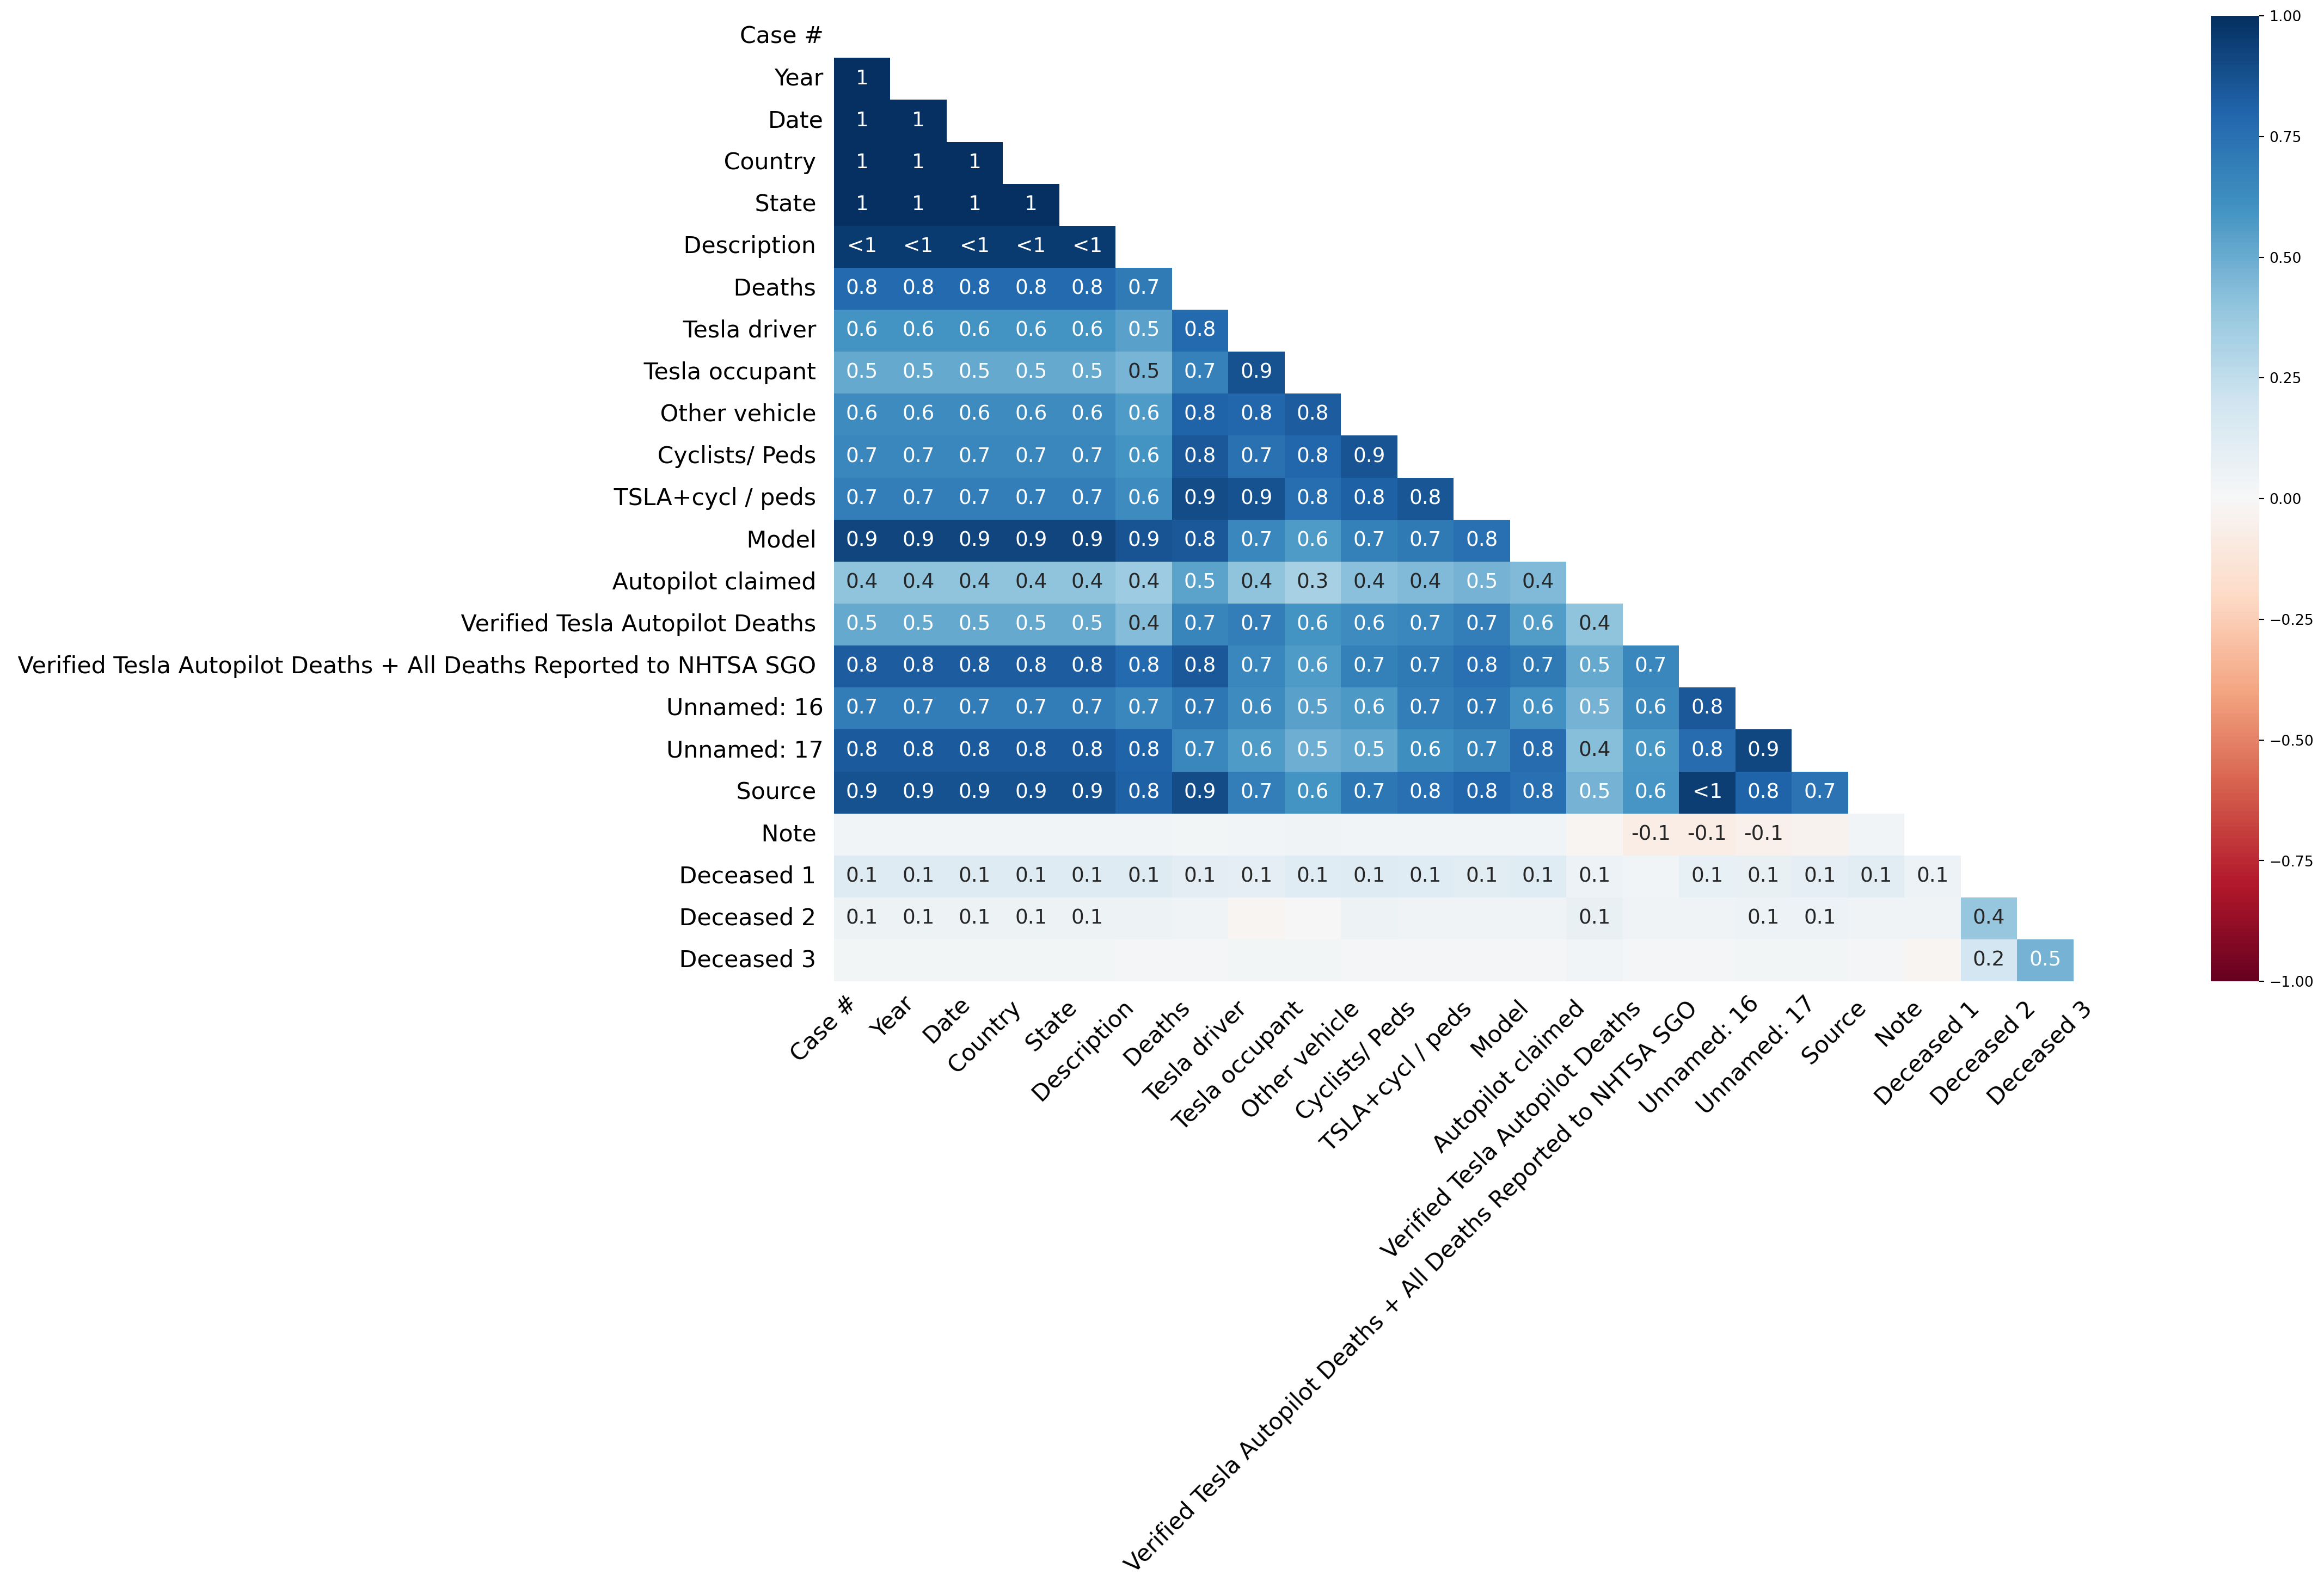

In [2]:
#| output: false
msno.heatmap(df)

![](./images/heatmap.png)

### The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.

### Remove unrelated columns to make the dataset more readable

In [3]:
new_df = pd.DataFrame()
for i in range(len(df.columns[:14]),1,-1):
    new_df.insert(0,df.columns[i],df[df.columns[i]])
df = new_df
df.head()

,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths
0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-
1,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-,-
2,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-
3,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-,-
4,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,1,1,-,-,-


<Axes: >

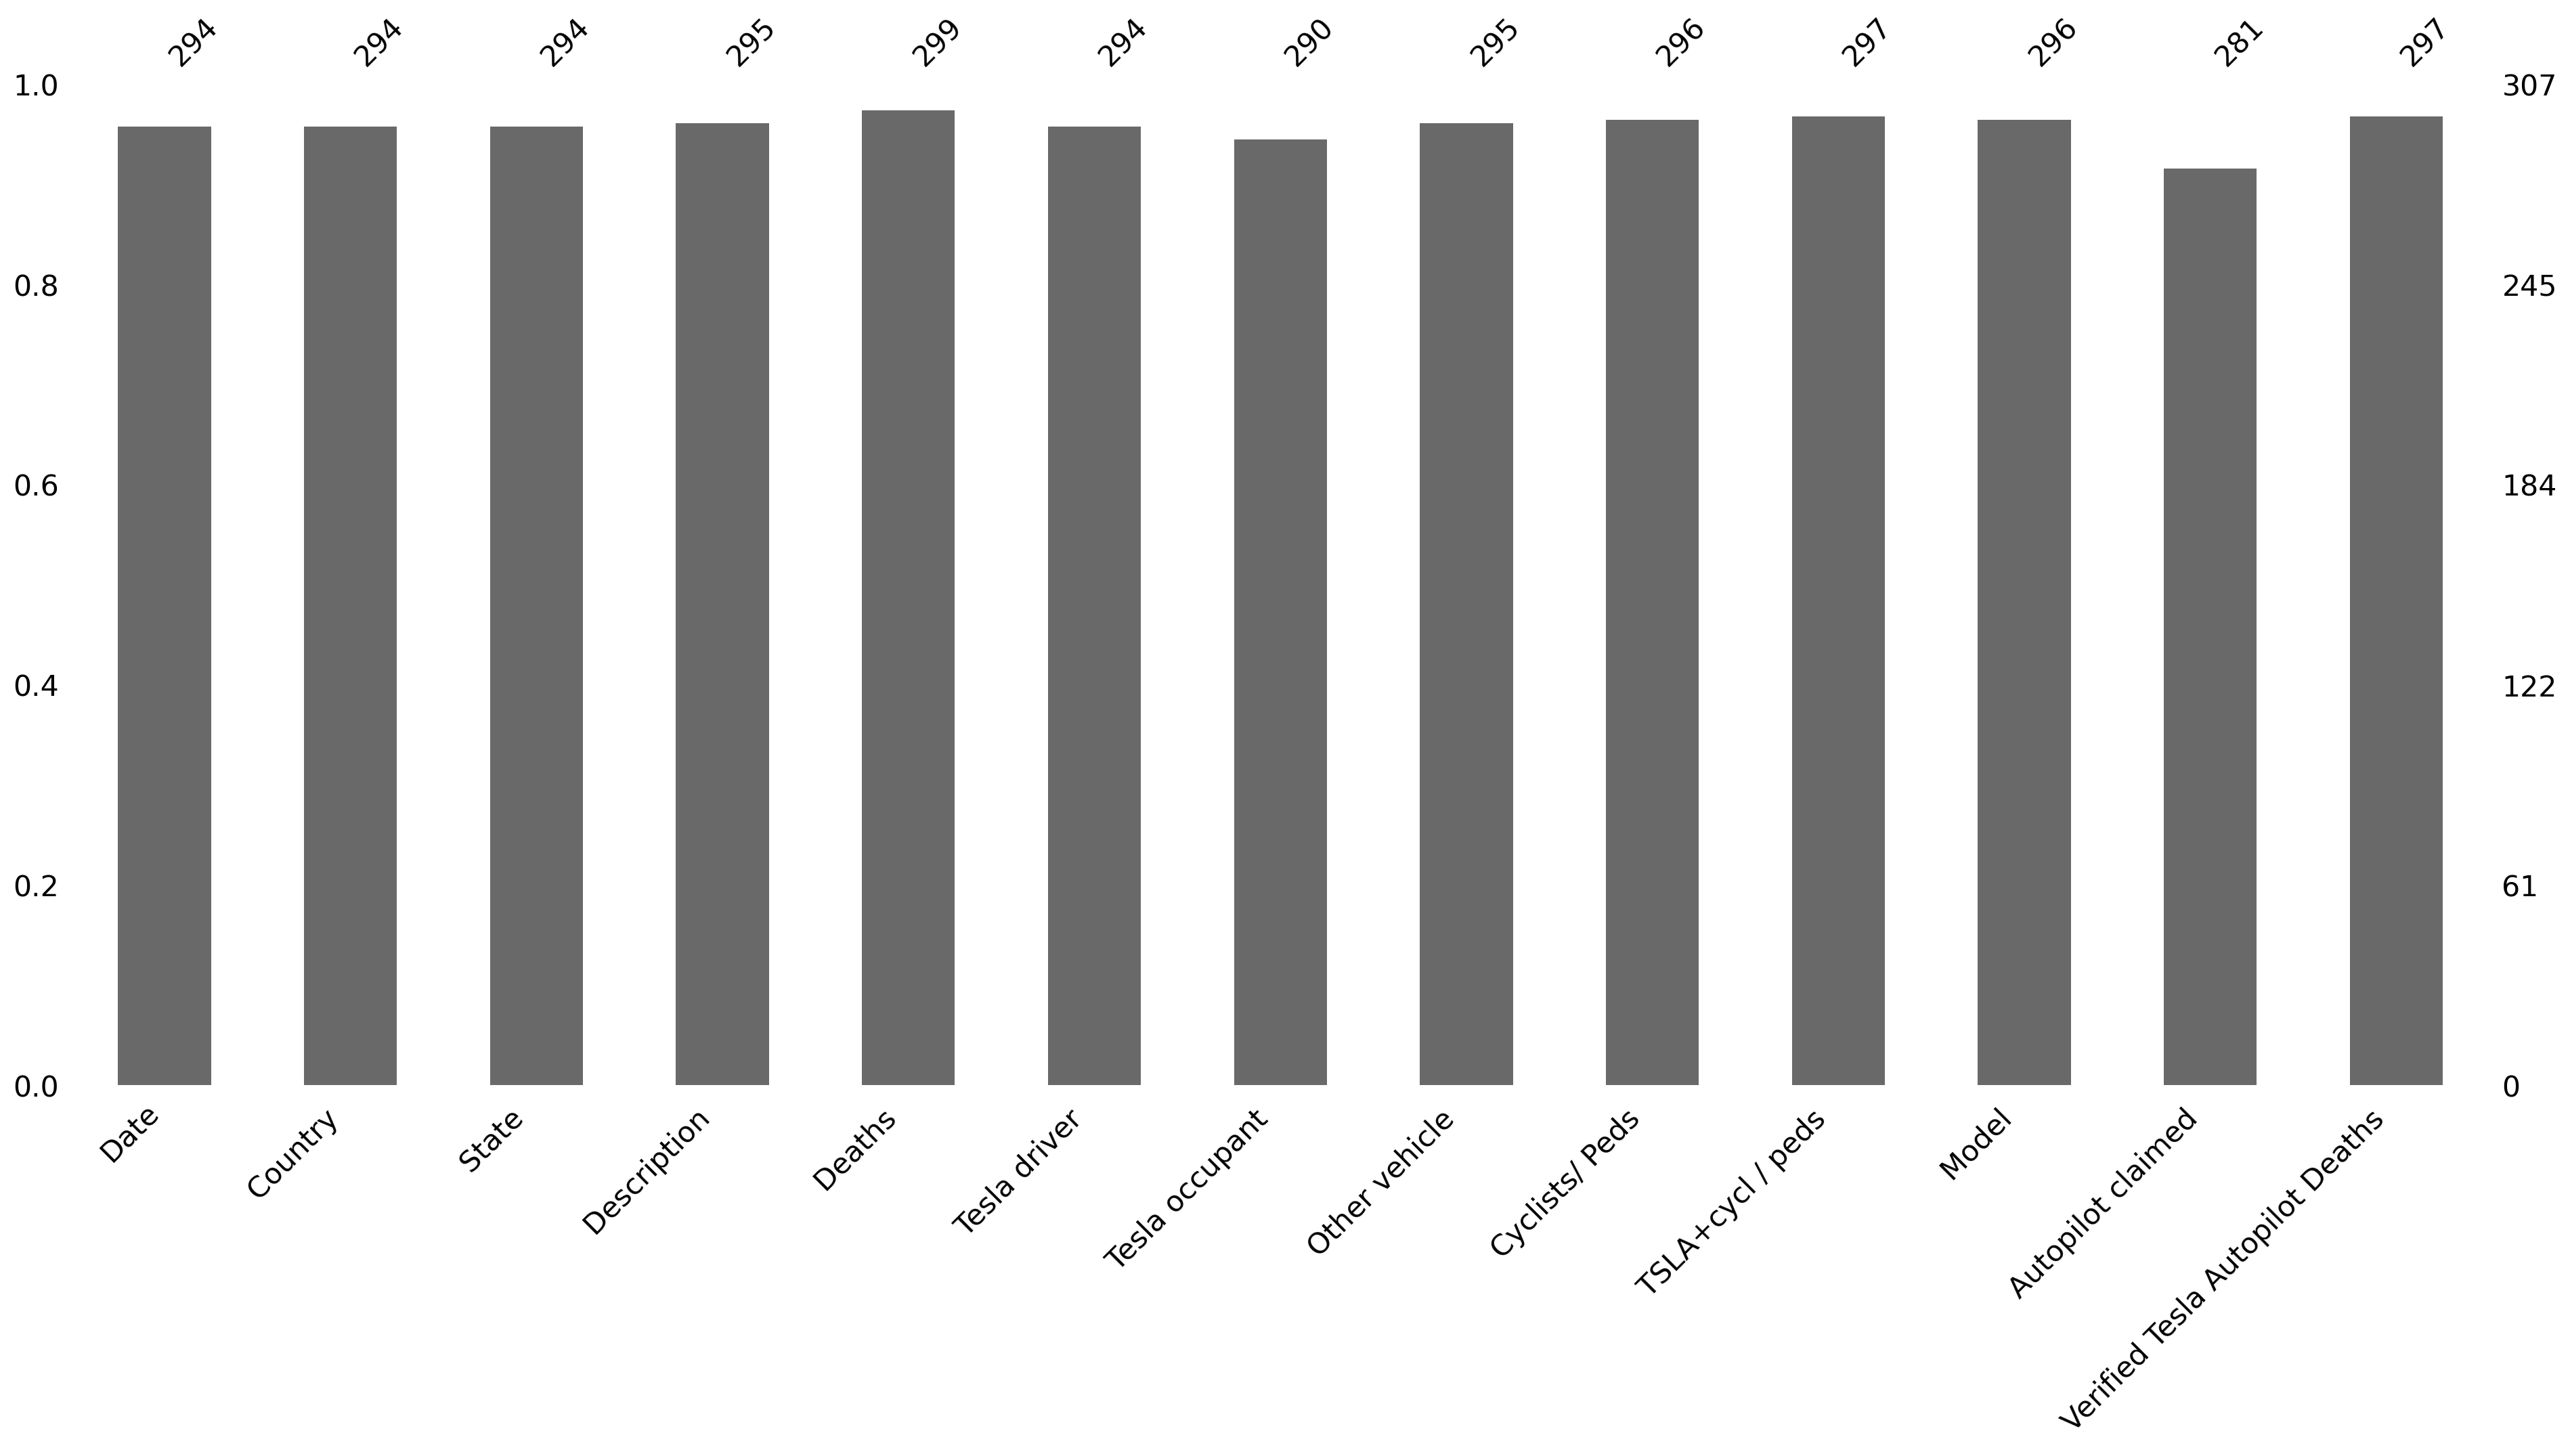

In [4]:
msno.bar(df)

### Every column that has fewer than 299 obervations is identified as having missing values. I assume that each observation with missing values for those variables is likely to be minor and to have no casualties, hence I make the following alternations.

<Axes: >

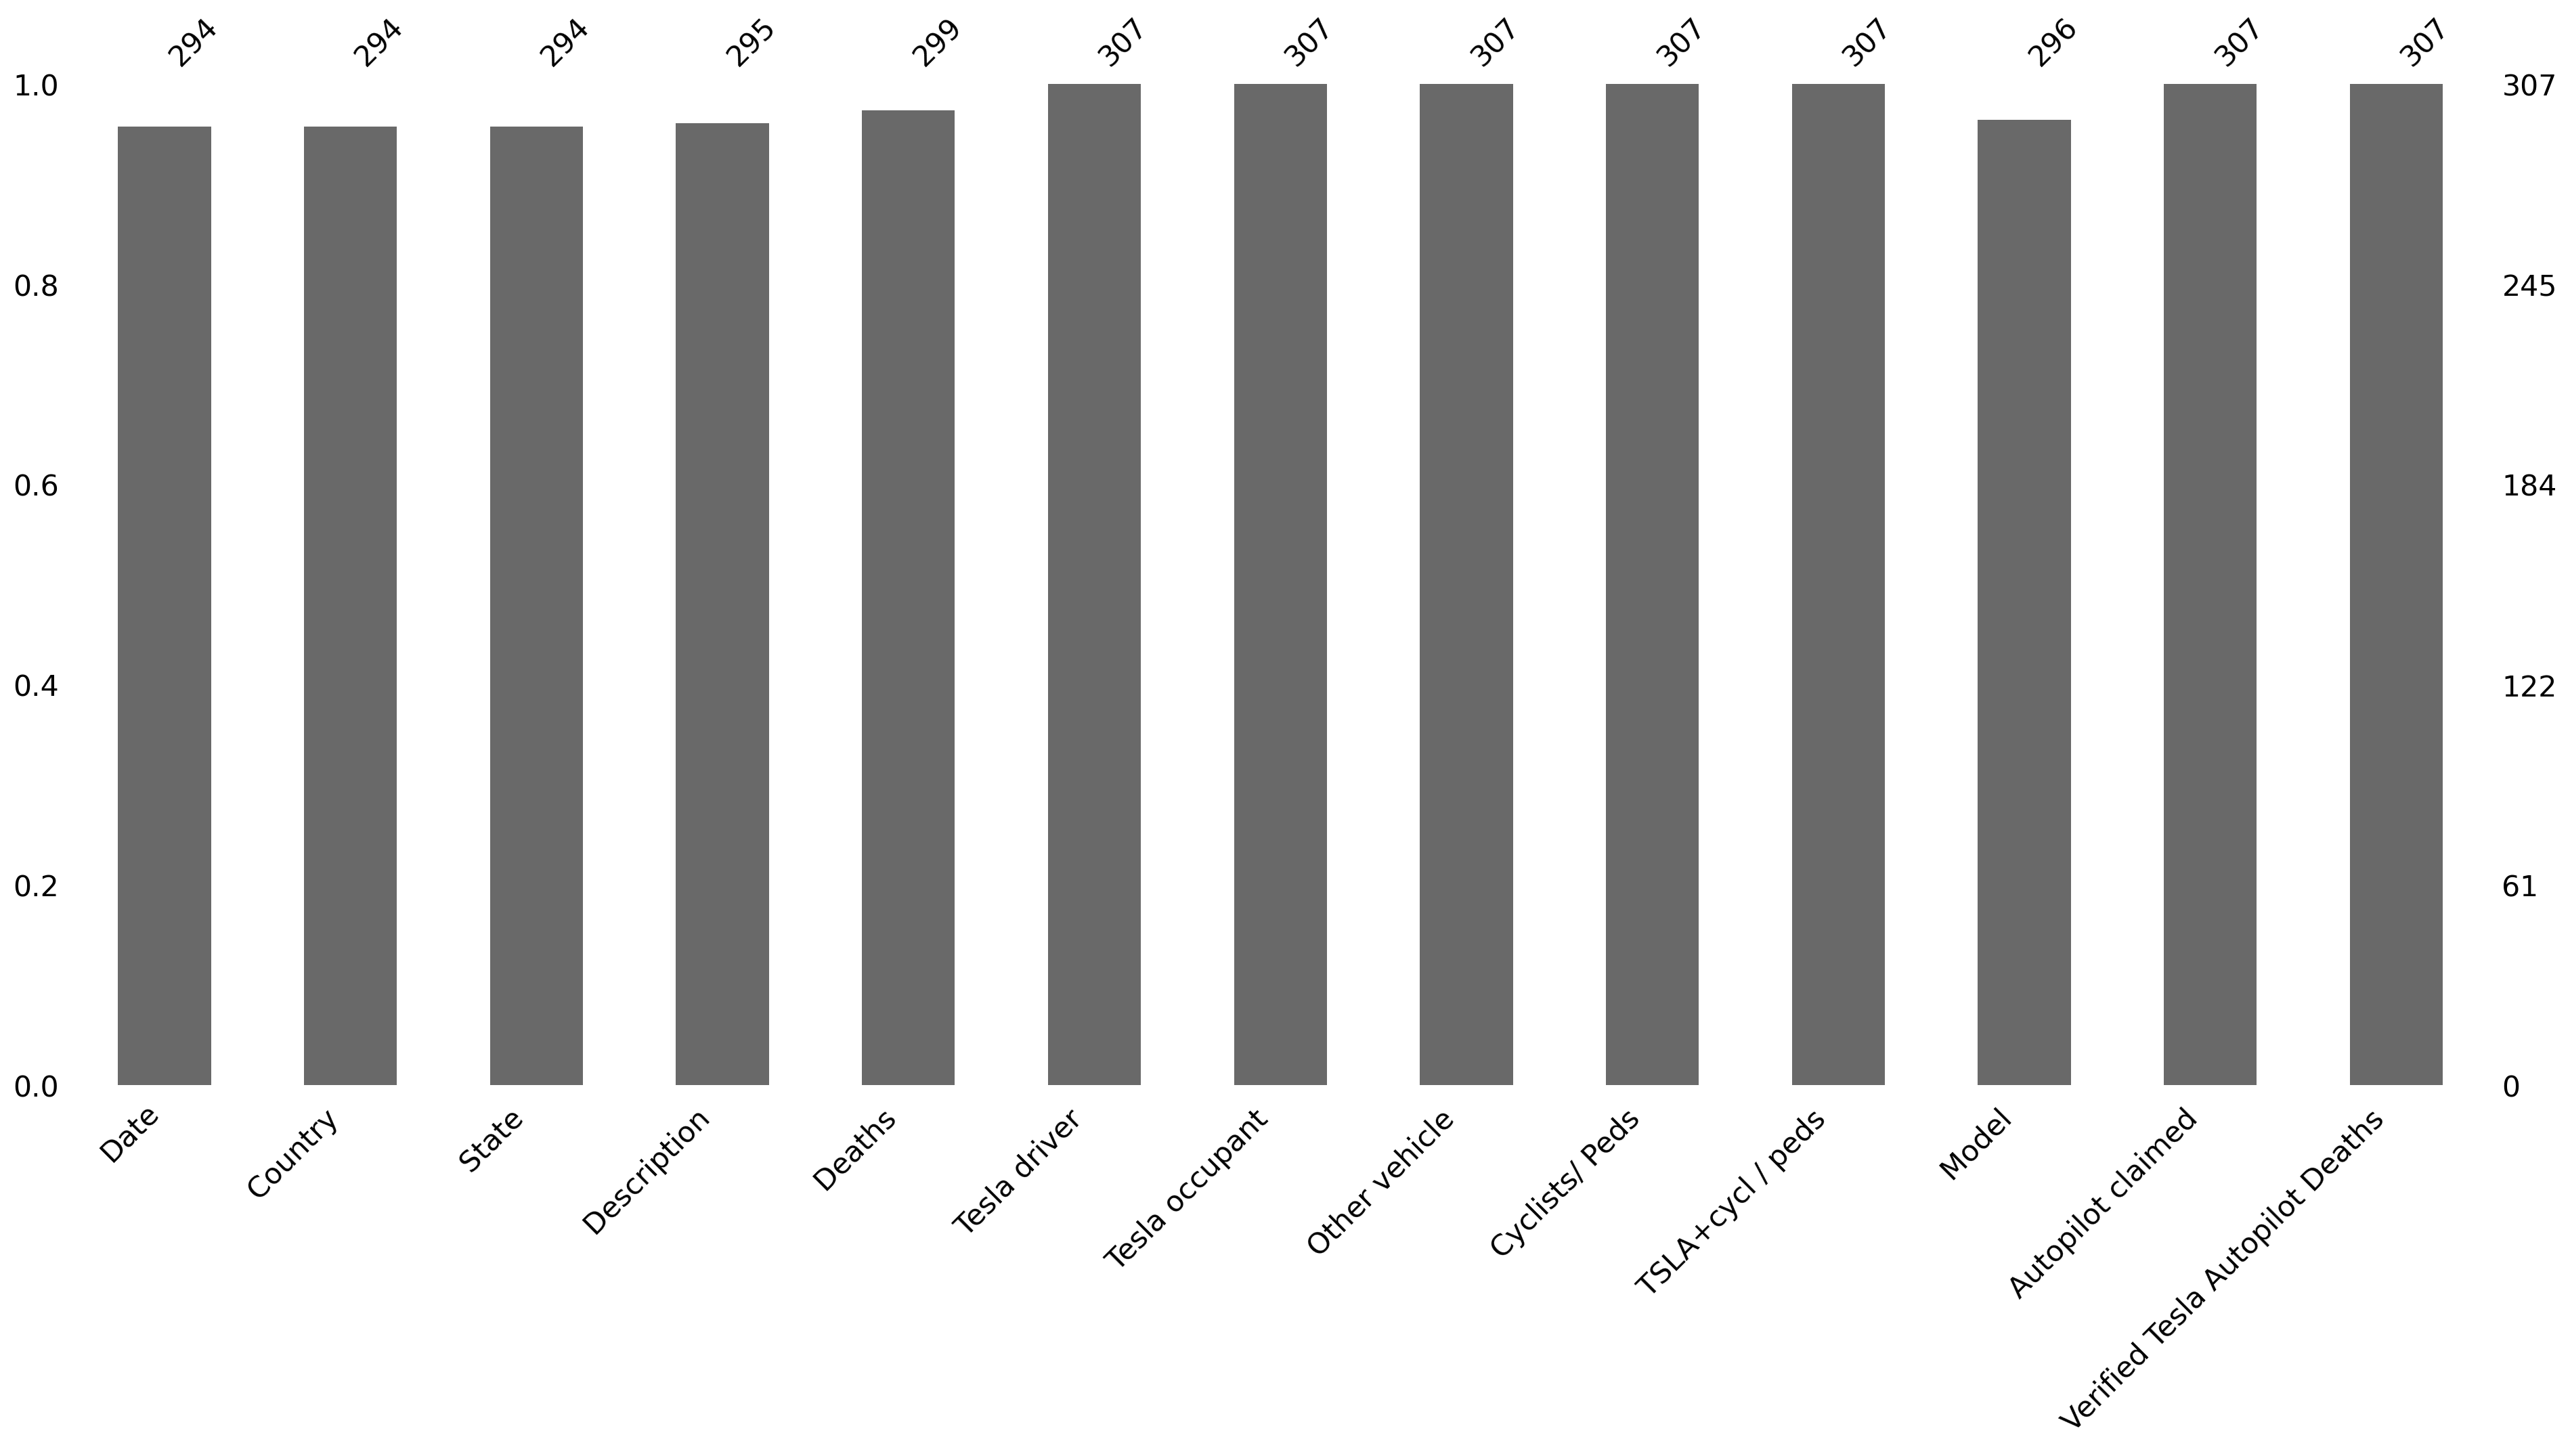

In [5]:
for i in range(5,10):
    df[df.columns[i]] = df[df.columns[i]].fillna("-")
for i in range(11,13):
    df[df.columns[i]] = df[df.columns[i]].fillna('-')
msno.bar(df)

### Remove every observation with empty value and rename the columns 

<Axes: >

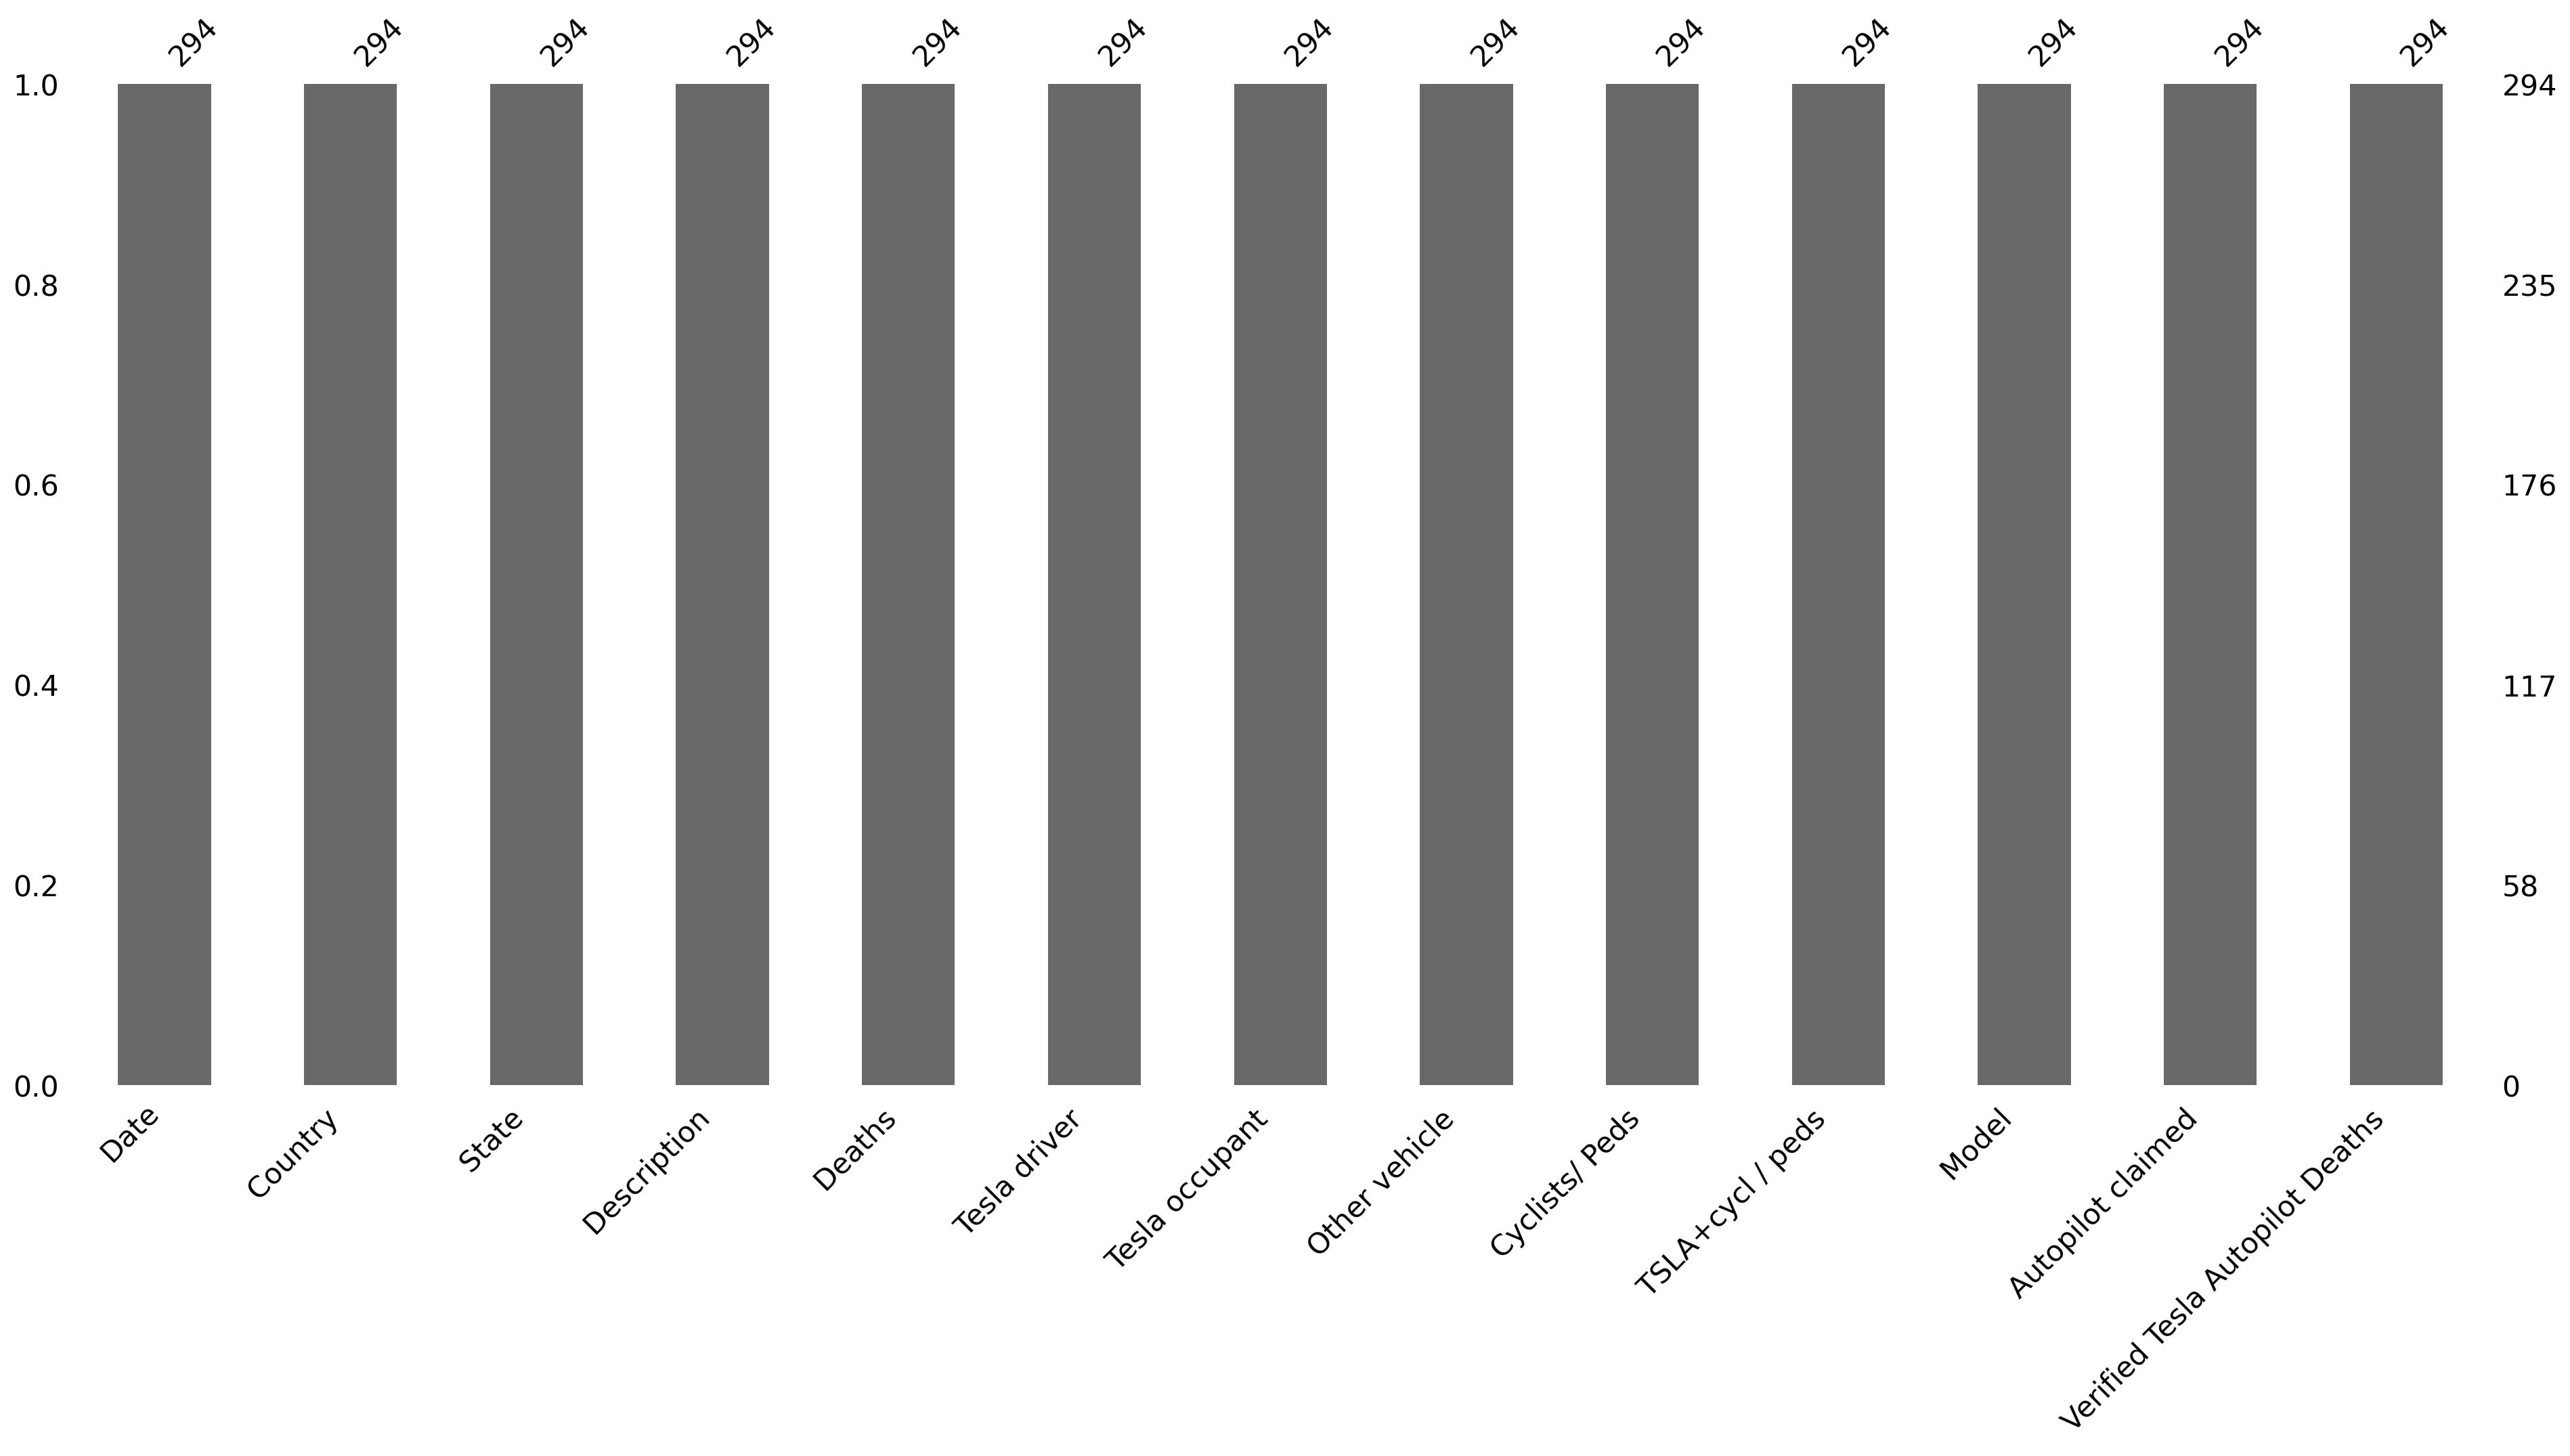

In [6]:
df = df.dropna()
msno.bar(df)

In [7]:
df.columns = ['Date','Country','State','Description','Deaths',"Tesla_driver","Tesla_occupant","Other_vehicle","CP","tsla+cp","Model","Claimed","VTAD"]
df.head()

,Date,Country,State,Description,Deaths,Tesla_driver,Tesla_occupant,Other_vehicle,CP,tsla+cp,Model,Claimed,VTAD
0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-
1,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-,-
2,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-
3,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-,-
4,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,1,1,-,-,-


### This dataset looks good so far and will be stored. I will do further cleaning if nececssary in further analysis.



## Second data: UK Road Safety: Traffic Accidents and Vehicles (gas car)

### Check data types and define X (predictor) and y (response) for further analysis and visualize the response variable 

The dataset contains 3 different data types and they are: object, int64, float64


Text(0, 0.5, 'Count')

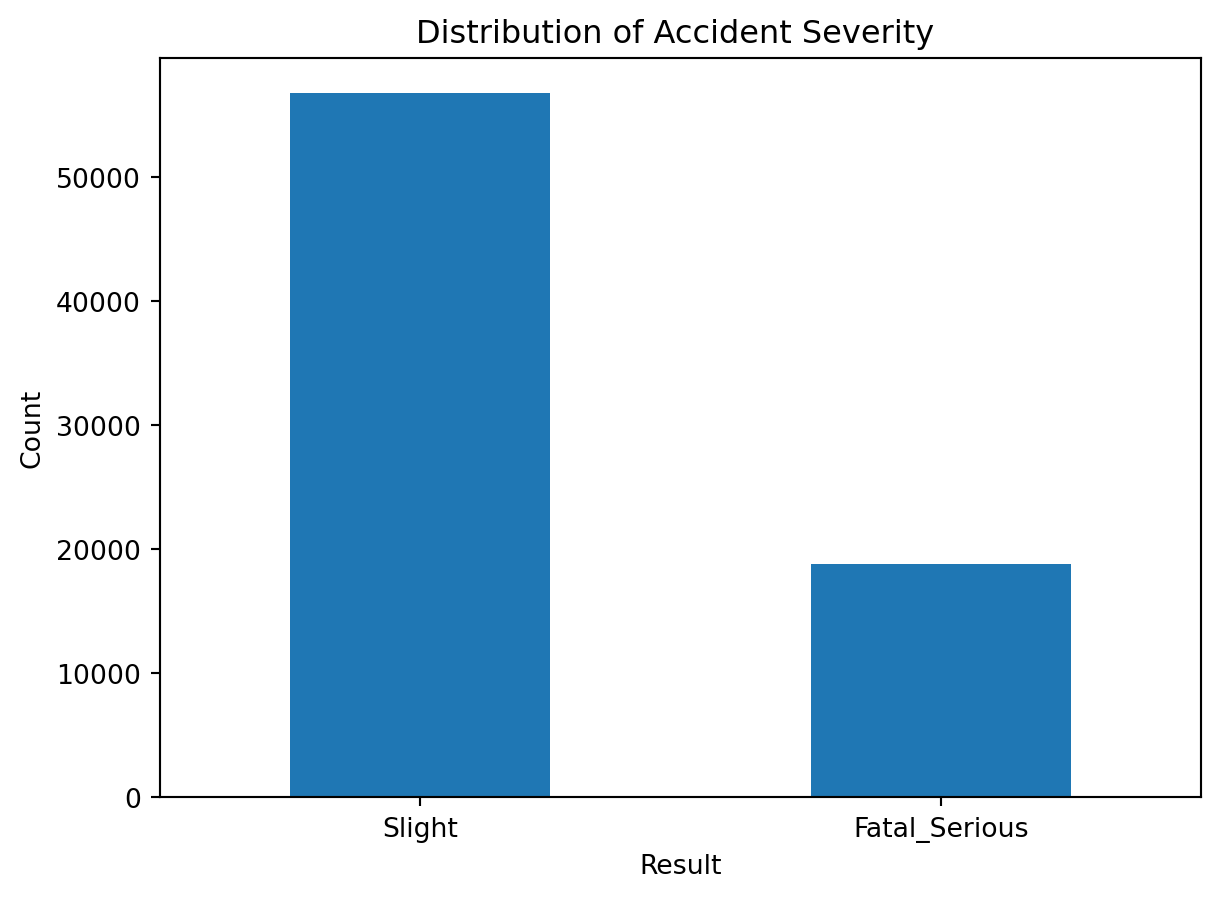

In [8]:
data = pd.read_csv('./Data/RoadAccident.csv')
column_datatypes = set()
for column in data.columns:
    column_datatypes.add(str(data[column].dtype))
print("The dataset contains {} different data types and they are: {}".format(len(column_datatypes), ", ".join(column_datatypes)))
X = data.drop(columns='Accident_Severity')
y = data['Accident_Severity']
count = pd.value_counts(y, sort = True)
count.plot(kind = 'bar', rot=0)
plt.title("Distribution of Accident Severity ")
plt.xlabel("Result")
plt.ylabel("Count")

### Check how many numerical variables there are in the dataset

In [9]:
numerical_features = list()
categorical_features = list()
for column in X.columns:
    if (data[column].dtype == 'float64' or data[column].dtype == 'int64'):
        numerical_features.append(column)
    elif (data[column].dtype == 'object'):
        categorical_features.append(column)
print('There are {} numerical features in the dataset.'.format(len(numerical_features)))

There are 15 numerical features in the dataset.


### See the distribution of each variable to determine any possible column to drop

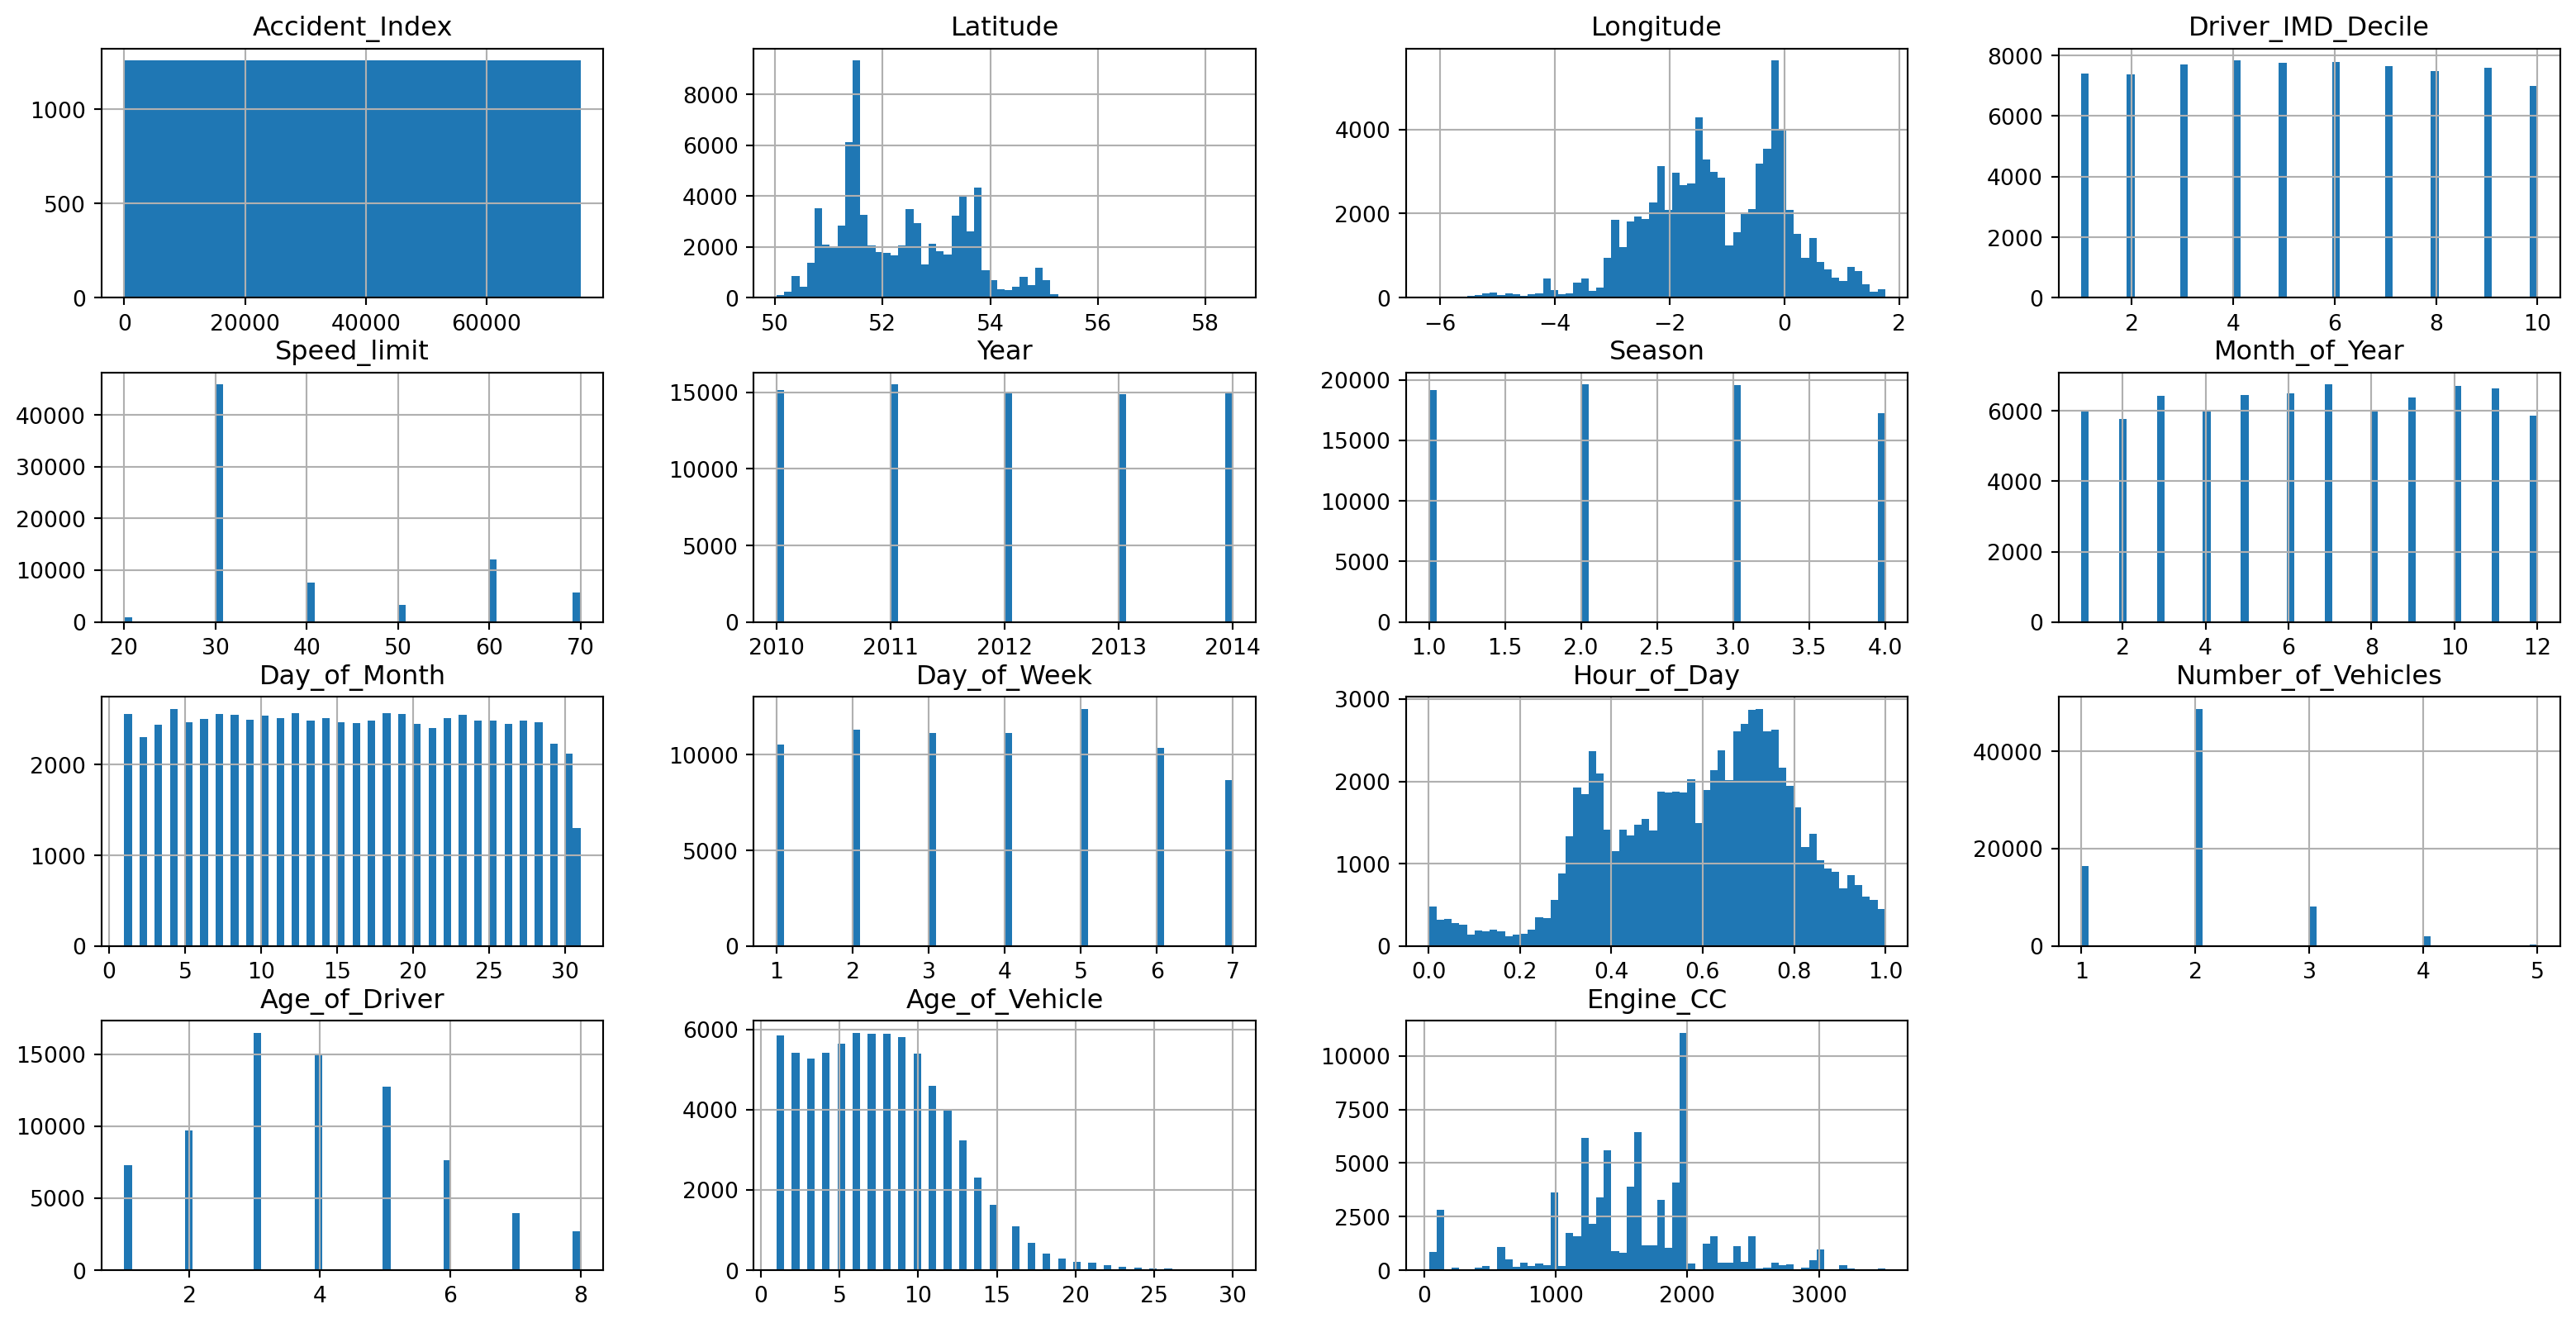

Number of uniques values of Accident Index: 75550


In [10]:
X_num_total = X[numerical_features]
X_num_total.hist(bins=60,figsize=(20, 10))
plt.show()
print('Number of uniques values of Accident Index: {}'.format(X_num_total['Accident_Index'].nunique()))

### The accident index is unrelated to our analysis in terms of its similarity to index, so we should drop this column

### Now we should check if there is any categorical variable that is uninformative and should be dropped

In [11]:
print('There are {} categorical features in the dataset.'.format(len(categorical_features)))
X_cat_total = X[categorical_features]
print('Unique values for each categorical column are:\n {}'.format(X_cat_total.nunique()))

There are 17 categorical features in the dataset.
Unique values for each categorical column are:
 Region                        11
Urban_or_Rural_Area            2
X1st_Road_Class                6
Road_Type                      5
Road_Surface_Conditions        5
Weather                        6
High_Wind                      2
Lights                         4
Datetime                   67926
Junction_Detail                8
Junction_Location              9
X1st_Point_of_Impact           5
Driver_Journey_Purpose         5
Propulsion_Code                2
Vehicle_Make                  25
Vehicle_Category               6
Vehicle_Manoeuvre             11
dtype: int64


In [12]:
data['Datetime']

0        1/19/2010 17:30
1         2/8/2010 11:24
2          3/3/2010 6:25
3         3/4/2010 13:35
4        3/12/2010 16:05
              ...       
75545     3/6/2014 18:20
75546    5/24/2014 15:50
75547     9/8/2014 12:06
75548    4/18/2014 15:52
75549    8/27/2014 16:16
Name: Datetime, Length: 75550, dtype: object

### The categorical value 'Datetime' gives no useful information and should be dropped as well

In [13]:
X = X.drop(columns=['Accident_Index','Datetime'])

### Check the correlation between the numerical features to see if there is any further issue

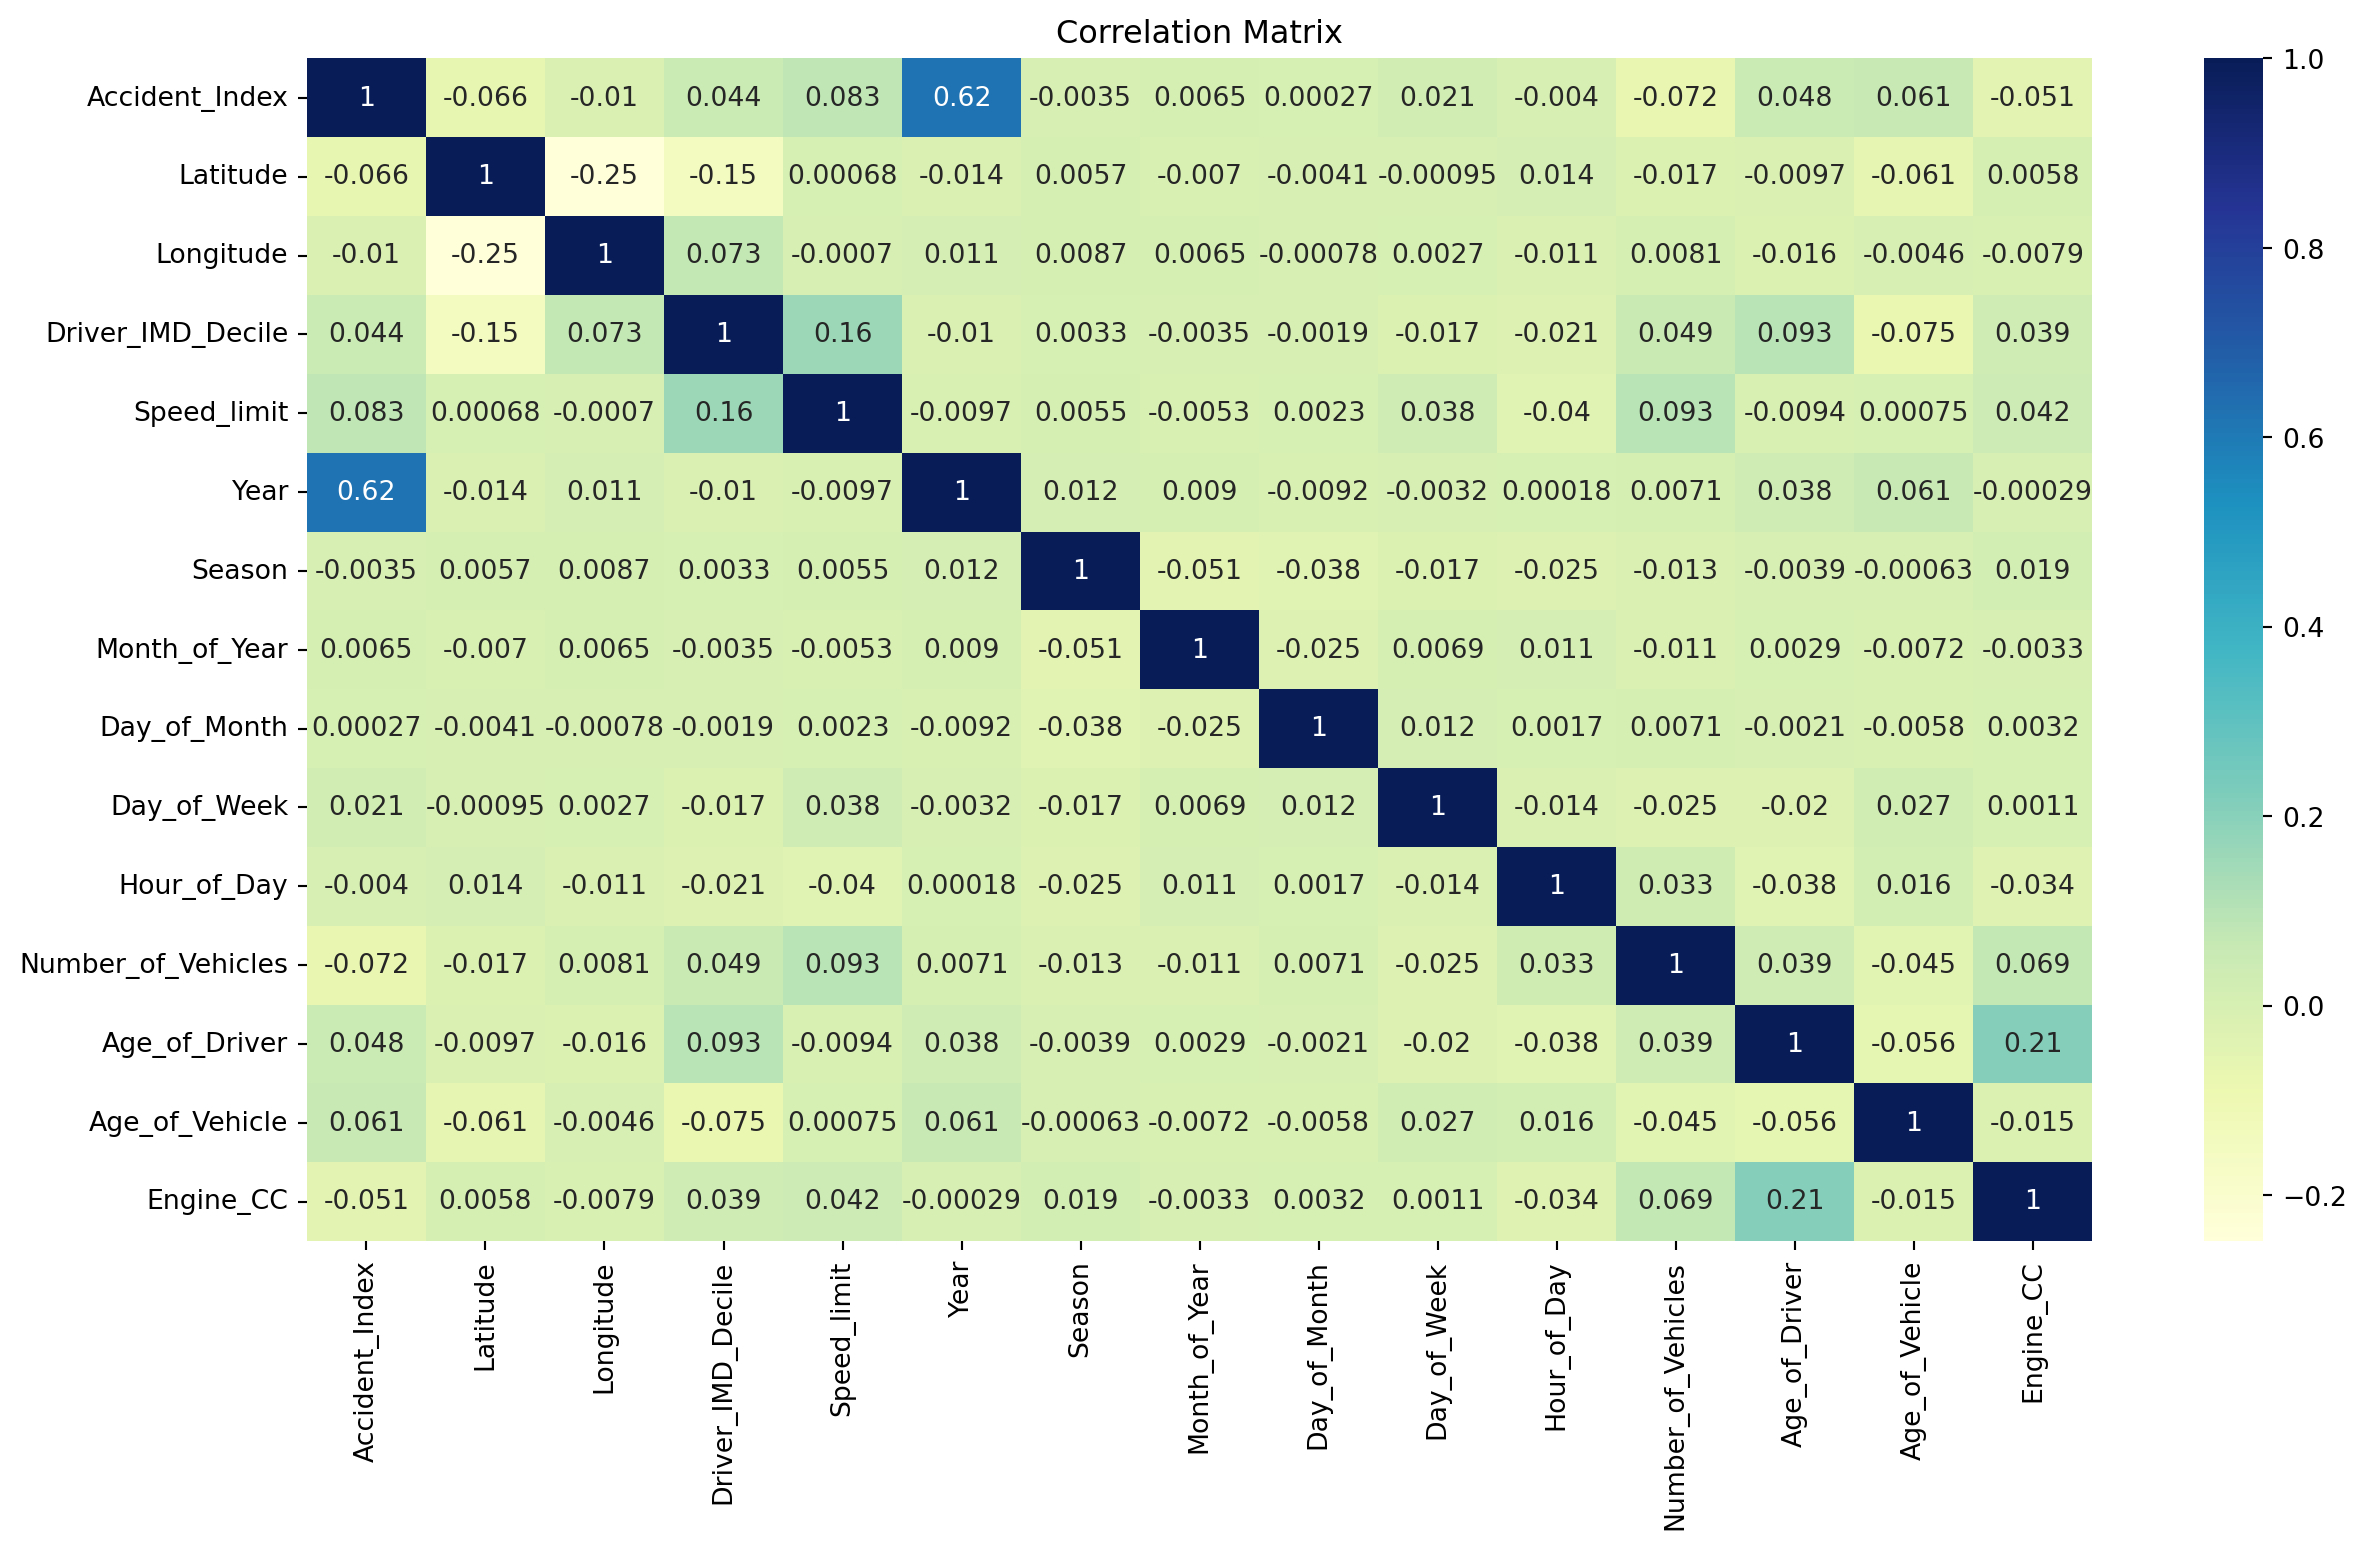

In [14]:
plt.subplots(figsize=(15,8))
sns.heatmap(X_num_total.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Matrix')
plt.show()

### This dataset looks good so far and will be stored. I will do further cleaning if nececssary in further analysis.

In [15]:
X.to_csv('./cleandata/cleanUKgas.csv', index=False)

## Third dataset (acquired using News-API and focused on the topic of 'Tesla-related accident')

### This dataset has two columns, and I will compute the frequency of some negative words in both columns and visualize the result

flawed: 1
negative: 0
death: 1
deadly: 0
accident: 9
bad: 0
casualty: 0
casualties: 0
injury: 0
problem: 0


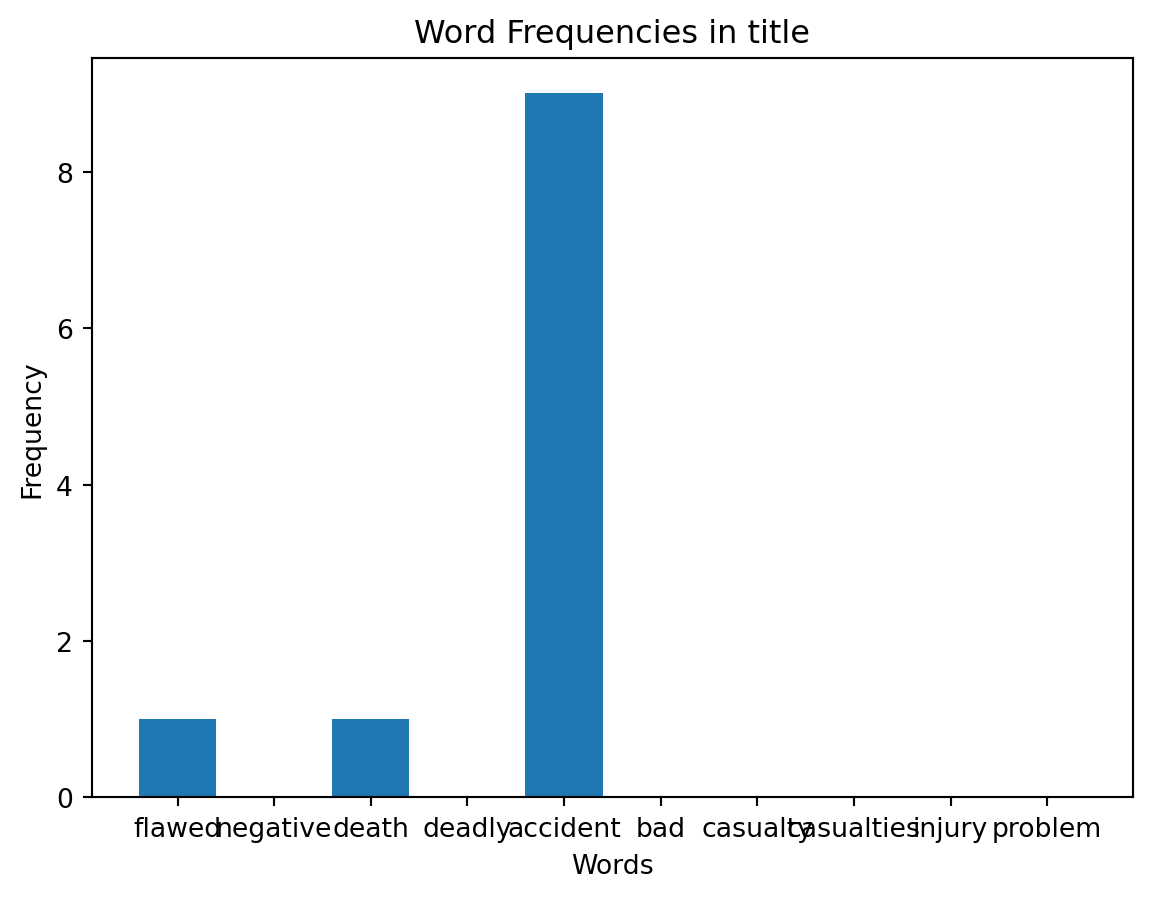

In [16]:
df = pd.read_csv('./Data/newapiTesla.csv')
def count_word_frequencies(data_frame, column_name, target_words):
    text = ' '.join(data_frame[column_name])
    words = text.split()
    word_counts = {word: words.count(word) for word in set(target_words)}
    return word_counts

target_words = ['deadly', 'flawed', 'death', 'injury', 'casualty', 'accident', 'casualties', 'problem', 'bad', 'negative']
word_frequencies = count_word_frequencies(df, 'title', target_words)
for word, count in word_frequencies.items():
    print(f"{word}: {count}")

plt.bar(word_frequencies.keys(), word_frequencies.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequencies in title')
plt.show()

flawed: 0
negative: 0
death: 1
deadly: 0
accident: 13
bad: 2
casualty: 0
casualties: 0
injury: 0
problem: 1


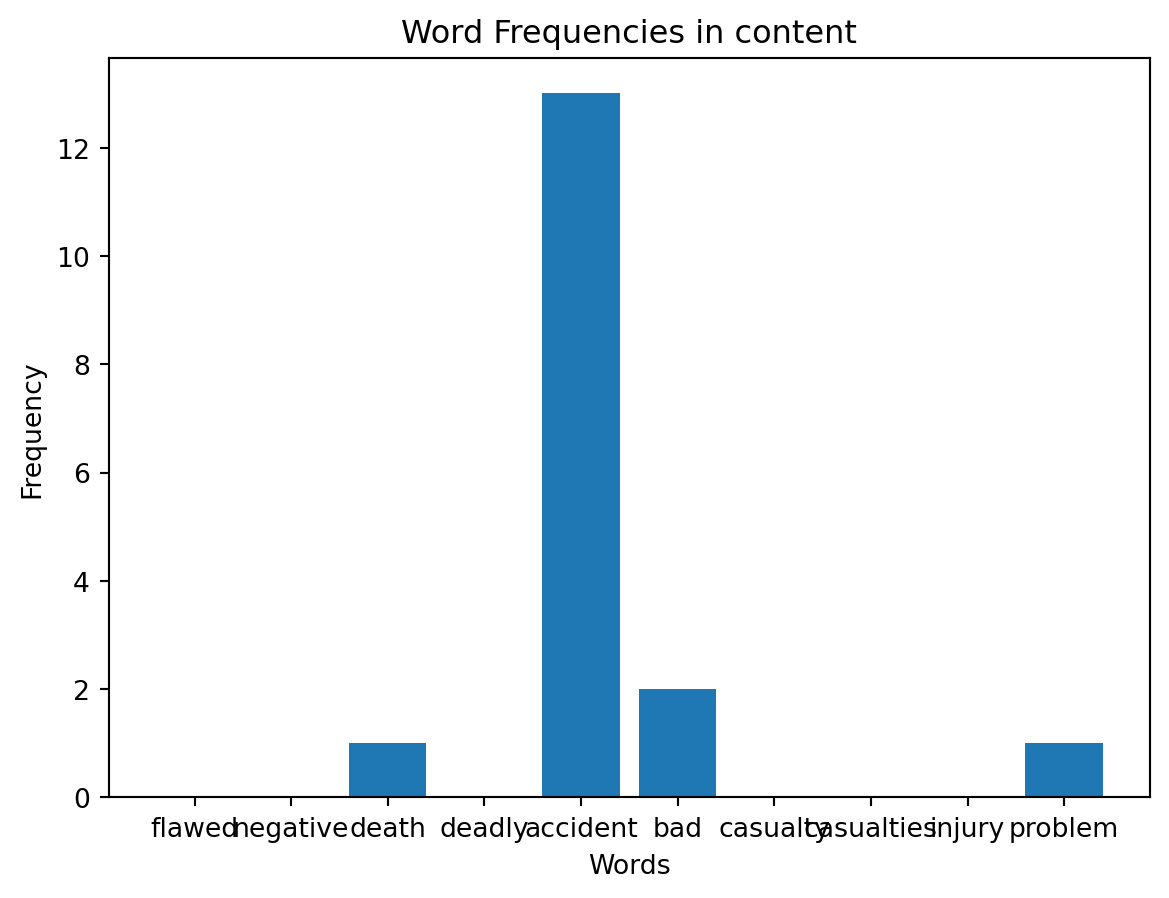

In [17]:
word_frequencies = count_word_frequencies(df, 'content', target_words)
for word, count in word_frequencies.items():
    print(f"{word}: {count}")

plt.bar(word_frequencies.keys(), word_frequencies.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequencies in content')
plt.show()

### So far, this text data seems good and ready to use. 